In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv("Occupation_and_Rel_to_HH_cleaned.csv")

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [6]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,1,0


___

### Infirmity

In [7]:
# check for null values
cd.null_checker(census_df)['Infirmity']

0

No nan value in the Infirmity column<br><br>

In [8]:
# check for empty string
cd.check_for_empty_str(census_df)['Infirmity']

True

In [9]:
infirmity = copy.deepcopy(census_df['Infirmity'])

Infirmity column contains blank(s).<br>
They are:

In [10]:
blank_infirmity = census_df.loc[infirmity.loc[(infirmity == ' ') | 
                                           (infirmity == '')].index]
blank_infirmity

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
340,2,Stirling View,Edward,Chan,44,Son,Single,M,Photographer,,Christian,"2, Stirling View",0,1,0
3345,28,Brightwater Drive,Megan,Jones,51,Head,Single,F,"Designer, textile",,Christian,"28, Brightwater Drive",0,1,0
3419,7,Peacock Neck,Kirsty,Simpson,22,Daughter,Widowed,F,University Student,,Catholic,"7, Peacock Neck",0,0,1
4562,6,Friaryrow Street,Debra,Wilkinson,5,Daughter,NaN,F,Student,,NaN,"6, Friaryrow Street",0,0,1
5644,8,Calendar Ranch,Jay,Smith,64,Husband,Married,M,Architectural technologist,,Christian,"8, Calendar Ranch",0,1,0


#### Fix blank Infirmity

In this situation, a blank/empty string in the Infirmity column simply means we DO NOT KNOW whether or not that individual has an infirmity.<br>
Therefore, I shall be using **'Undisclosed'** as a placeholder for blanks/empty strings.
<br><br>

In [11]:
infirmity.loc[blank_infirmity.index] = 'Undisclosed'

In [12]:
# checking blank entries
infirmity.loc[blank_infirmity.index]

340     Undisclosed
3345    Undisclosed
3419    Undisclosed
4562    Undisclosed
5644    Undisclosed
Name: Infirmity, dtype: object

In [13]:
print(infirmity.unique())

['None' 'Mental Disability' 'Physical Disability' 'Deaf' 'Undisclosed'
 'Disabled' 'Unknown Infection' 'Blind']


**NOTE:**<br>
Blindness and deafness are both forms of physical disability.<br>
Therefore, I shall include the blind and deaf to the Physically Disability category.<br><br>

In [14]:
infirmity.loc[(infirmity == "Blind") |
             (infirmity == "Deaf")] = "Physical Disability"

In [15]:
print(infirmity.unique())

['None' 'Mental Disability' 'Physical Disability' 'Undisclosed' 'Disabled'
 'Unknown Infection']


In [16]:
infirmity_freq = infirmity.value_counts()
print(infirmity_freq)

None                   7540
Physical Disability      24
Mental Disability         5
Undisclosed               5
Unknown Infection         5
Disabled                  2
Name: Infirmity, dtype: int64


In [17]:
infirmity_freq_perc = sns.categorical.np.round(100 * infirmity_freq/infirmity.shape[0], 3)
print(infirmity_freq_perc)

None                   99.459
Physical Disability     0.317
Mental Disability       0.066
Undisclosed             0.066
Unknown Infection       0.066
Disabled                0.026
Name: Infirmity, dtype: float64


In [18]:
minority_freq = infirmity_freq.loc[infirmity_freq < 0.1*infirmity.shape[0]]
minority_freq

Physical Disability    24
Mental Disability       5
Undisclosed             5
Unknown Infection       5
Disabled                2
Name: Infirmity, dtype: int64

In [19]:
minority_freq_perc = infirmity_freq_perc.loc[infirmity_freq_perc < 10]
minority_freq_perc

Physical Disability    0.317
Mental Disability      0.066
Undisclosed            0.066
Unknown Infection      0.066
Disabled               0.026
Name: Infirmity, dtype: float64

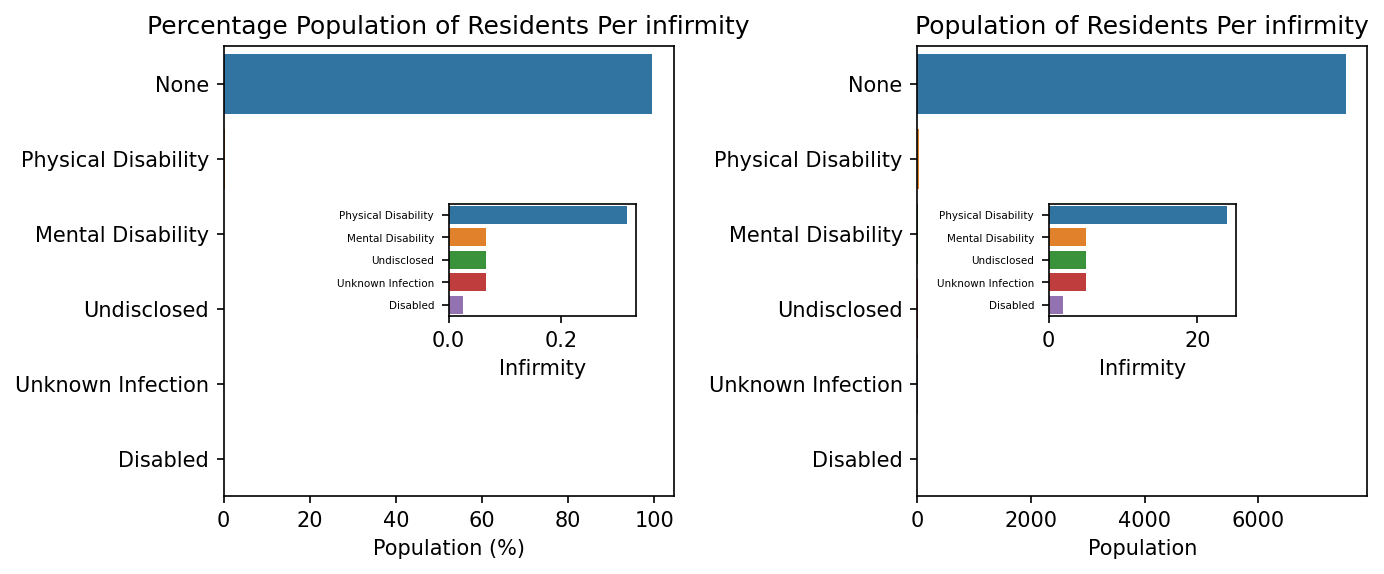

In [20]:
fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.925, 0, 0.6, 1])
z, z2 = fig.add_axes([0.3, 0.4, 0.25, 0.25]), fig.add_axes([1.1, 0.4, 0.25, 0.25])

left = sns.barplot(y=infirmity_freq_perc.index, x=infirmity_freq_perc, order=infirmity_freq_perc.index, ax=l)
right = sns.barplot(y=infirmity_freq.index, x=infirmity_freq, 
                    order=infirmity_freq.index, ax=r)
perc_zoomed = sns.barplot(y=minority_freq_perc.index, x=minority_freq_perc, ax=z,
                     order=minority_freq_perc.index)
zoomed = sns.barplot(y=minority_freq.index, x=minority_freq, ax=z2,
                     order=minority_freq.index)

left.set_xlabel("Population (%)"), right.set_xlabel("Population")

perc_zoomed.set_yticklabels(minority_freq_perc.index, fontsize=5)
zoomed.set_yticklabels(minority_freq.index, fontsize=5)

left.set_title("Percentage Population of Residents Per infirmity")
right.set_title("Population of Residents Per infirmity")

sns.relational.plt.show()

From the plot above, we can see that over 99% of residents have no infirmity. And Physical Disability is the most prominent infirmity.

#### Replace the old "Infirmity" column in the original census_df dataframe with cleaned series, "infirmity".

In [21]:
census_df['Infirmity'] = infirmity

In [22]:
print(cd.unique_categs(census_df)['Infirmity'])

['None', 'Mental Disability', 'Physical Disability', 'Undisclosed', 'Disabled', 'Unknown Infection']


___

### Age

In [23]:
print(cd.null_checker(census_df)['Age'])

0


**NOTE:**<BR>
There are no nan values in the Age column

In [24]:
print(cd.check_for_empty_str(census_df)['Age'])

False


**NOTE:**<BR>
No blanks in the Age column, as well.

In [25]:
print(cd.unique_categs(census_df)['Age'])

['43', '44', '5', '25', '24', '3', '105', '73', '19', '10', '57', '30', '2', '88', '85', '52', '56', '28', '47', '20', '75', '59', '42', '61', '67', '66', '76', '77', '50', '26', '27', '55', '53', '29', '11', '22', '64', '68', '38', '34', '32', '37', '13', '69', '81', '60', '72', '31', '54', '83', '41', '39', '33', '4', '48', '62', '70', '46', '16', '84', '65', '15', '21', '40', '14', '12', '23', '74', '7', '51', '92', '6', '45', '63', '18', '36', '55.55', '17', '9', '71', 'Four', '49', '0', '80', '89', '91', '35', '1.75', 'One', '58', '8', '1', '82', '79', '98', '100', '78', '94', '104', '96', '86', '87', '58.5088688', '0.5', '103', '93', '119', '90', '106', '55.52492408', '56.52492408', '131', '107', '55.27579403', '57.27579403', '99', '97', '-1', '95', '55.63583519', '59.22686093']


**NOTE:**<br>
The current state of Age column is unacceptable. Ideally, ages should be integers. But here, we can see values in different formats such as spelling of numbers, decimal figures in string, and integers in string.<br><br>

In [26]:
# create a copy of age series to avoid making
# unwanted changes to the main dataframe
age = copy.deepcopy(census_df['Age'])

Before we can change the datatype of age to int, we must first make sure that all of its values are convertible to integers

#### Change all spellings to numbers

In [27]:
converter = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
age = cd.transform_val(age, converter)

In [28]:
print(age.unique())

['43' '44' '5' '25' '24' '3' '105' '73' '19' '10' '57' '30' '2' '88' '85'
 '52' '56' '28' '47' '20' '75' '59' '42' '61' '67' '66' '76' '77' '50'
 '26' '27' '55' '53' '29' '11' '22' '64' '68' '38' '34' '32' '37' '13'
 '69' '81' '60' '72' '31' '54' '83' '41' '39' '33' '4' '48' '62' '70' '46'
 '16' '84' '65' '15' '21' '40' '14' '12' '23' '74' '7' '51' '92' '6' '45'
 '63' '18' '36' '55.55' '17' '9' '71' '49' '0' '80' '89' '91' '35' '1.75'
 '1' '58' '8' '82' '79' '98' '100' '78' '94' '104' '96' '86' '87'
 '58.5088688' '0.5' '103' '93' '119' '90' '106' '55.52492408'
 '56.52492408' '131' '107' '55.27579403' '57.27579403' '99' '97' '-1' '95'
 '55.63583519' '59.22686093']


#### Round up all decimals to nearest integers

In [29]:
age = age.apply(cd.round_up_num)

In [30]:
print(age.unique())

['43' '44' '5' '25' '24' '3' '105' '73' '19' '10' '57' '30' '2' '88' '85'
 '52' '56' '28' '47' '20' '75' '59' '42' '61' '67' '66' '76' '77' '50'
 '26' '27' '55' '53' '29' '11' '22' '64' '68' '38' '34' '32' '37' '13'
 '69' '81' '60' '72' '31' '54' '83' '41' '39' '33' '4' '48' '62' '70' '46'
 '16' '84' '65' '15' '21' '40' '14' '12' '23' '74' '7' '51' '92' '6' '45'
 '63' '18' '36' '17' '9' '71' '49' '0' '80' '89' '91' '35' '1' '58' '8'
 '82' '79' '98' '100' '78' '94' '104' '96' '86' '87' '103' '93' '119' '90'
 '106' '131' '107' '99' '97' '-1' '95']


After changing spellings to numbers and rounding up all decimals, the values now appear ready to be converted into type int.<br><br>

#### Cast the age series to type int

In [31]:
age = sns.categorical.pd.to_numeric(age)

In [32]:
print(age.dtypes)

int64


In [33]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 131 107  99  97  -1
  95]


**Fix error of -1 years old**

In [34]:
# Take a look at those having an age of -1
neg_age = census_df.loc[age.loc[age == -1].index]
neg_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
6432,30,St.Matthew Avenue,Matthew,Wilson-Hughes,-1,Son,NaN,M,Child,None,NaN,"30, St.Matthew Avenue",0,0,0


Now we know that Matthew Wilson-Hughes is a boy who resides at 30, St. Matthew Avenue.

In [35]:
# look at members of his household
census_df.loc[census_df['Address'] == neg_age['Address'].values[0]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
6429,30,St.Matthew Avenue,Marilyn,Hughes,21,Head,Married,F,University Student,None,None,"30, St.Matthew Avenue",0,0,1
6430,30,St.Matthew Avenue,Samuel,Hughes,26,Husband,Married,M,Agricultural engineer,None,None,"30, St.Matthew Avenue",0,1,0
6431,30,St.Matthew Avenue,Charlene,Wilson-Hughes,2,Daughter,NaN,F,Child,None,NaN,"30, St.Matthew Avenue",0,0,0
6432,30,St.Matthew Avenue,Matthew,Wilson-Hughes,-1,Son,NaN,M,Child,None,NaN,"30, St.Matthew Avenue",0,0,0
6433,30,St.Matthew Avenue,Declan,Wallis,63,Lodger,Divorced,M,Research scientist (medical),None,Catholic,"30, St.Matthew Avenue",0,1,0
6434,30,St.Matthew Avenue,Jordan,Dawson,32,Lodger,Single,M,Exercise physiologist,None,Muslim,"30, St.Matthew Avenue",0,1,0


NOTE:<br>
There are 6 occupants residing at 30, St. Matthew Avenue. However, looking at their surnames gives it away. <br>
The Hughes household consists of 4 occupants, with the parents (Husband & Wife) being in their twenties. <br>It is important to note that the wife's age is 21, which means the youngest she could have gotten married is at age 18 (3 years prior). <br>
Hence, it seems reasonable to assume that Charlene Wilson-Hughes is their oldest child and Matthew Wilson-Hughes would be the younger child.<br>
***Therefore, it is likely that -1 was mistakenly written instead of age 1.<br>
Hence, I shall now proceed to correct this mistake by changing Matthew Wilson-Hughes' age from -1 to 1***<br><br>

In [36]:
age.loc[neg_age.index] = 1

In [37]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 131 107  99  97  95]


#### Fix error of being older than 122 years old

Take a look at those older than the oldest person ever - 122 years

In [38]:
older_than_oldest = census_df.loc[age.loc[age > 122].index]
older_than_oldest

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,F,Retired Clinical psychologist,None,Christian,"8, Cancerpath Drive",1,1,0


In [39]:
# Take a look at Josephine Holmes' household
census_df.loc[census_df['Address'] == older_than_oldest['Address'].values[0]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,F,Retired Clinical psychologist,None,Christian,"8, Cancerpath Drive",1,1,0
3991,8,Cancerpath Drive,Stewart,Holmes,107,Husband,Married,M,Retired Rural practice surveyor,None,Christian,"8, Cancerpath Drive",1,1,0


**NOTE:**<br>
Knowing that Josephine is married to Stewart Holmes, who is 107 years old and still living, it is reasonable to expect that her own age shouldn't be very far from that of her husband's.<br>
This error could be because she can no longer correctly recall her age - due to old age.<br>
However, in marriages, it is quite common to see an older husband/younger wife combination.<br>
Therefore, I shall assign Josephine Holmes an age that is 5 years below that of Stewart Holmes.

In [40]:
# make Josephine Holmes 5 years younger than Stewart Holmes (her husband)
age.loc[older_than_oldest.index] = age.loc[census_df.loc[(census_df['Surname'] == 'Holmes') &
                                                         (census_df['First Name'] == 'Stewart')].index].apply(lambda val: int(val) - 5).values[0]

In [41]:
age.loc[older_than_oldest.index]

3990    102
Name: Age, dtype: int64

In [42]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 102 107  99  97  95]


#### Replace the old "Age" column in the original census_df dataframe with cleaned series, "age".

In [43]:
census_df['Age'] = age

In [44]:
census_df['Age'].dtypes

dtype('int64')

___

In [45]:
retired_ages = census_df.loc[census_df['Retired'] == 1, 'Age']

In [46]:
retired_age_freq = retired_ages.value_counts().sort_index()
retired_age_freq

68     52
69     45
70     53
71     42
72     52
73     54
74     43
75     42
76     33
77     37
78     29
79     26
80     28
81     24
82     27
83     33
84     34
85     18
86     16
87      9
88     16
89     14
90      6
91      4
92      4
93      5
94      4
95      1
96      2
97      2
98      2
99      1
100     1
102     1
103     1
104     2
105     1
106     1
107     1
119     2
Name: Age, dtype: int64

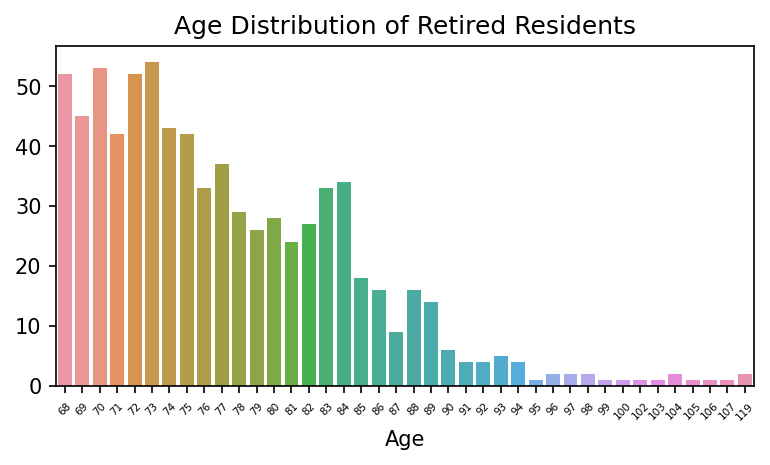

In [47]:
retired_age_freq_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
retired_plotted = sns.barplot(x=retired_age_freq.index, y=retired_age_freq)
retired_plotted.set_xticklabels(labels=retired_age_freq.index, fontsize=5, rotation=45)
retired_plotted.set_ylabel(None), retired_plotted.set_xlabel('Age')
retired_plotted.set_title("Age Distribution of Retired Residents");

In [48]:
fname='age_distrib_of_retired.png'
cd.fig_writer(fname, retired_age_freq_fig)

'age_distrib_of_retired.png'

___

In [49]:
age_binned = sns.categorical.pd.cut(age, [0, 18, 25, 40, 68, 122])
age_binned

0       (40, 68]
1       (40, 68]
2        (0, 18]
3        (0, 18]
4       (18, 25]
          ...   
7576    (25, 40]
7577     (0, 18]
7578     (0, 18]
7579     (0, 18]
7580     (0, 18]
Name: Age, Length: 7581, dtype: category
Categories (5, interval[int64, right]): [(0, 18] < (18, 25] < (25, 40] < (40, 68] < (68, 122]]

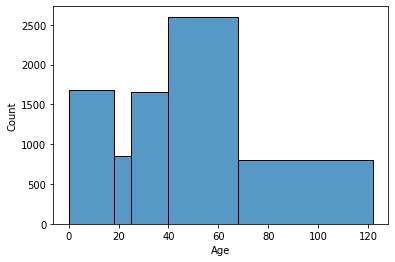

In [50]:
hplot = sns.histplot(data=census_df, x='Age', bins=[0, 18, 25, 40, 68, 122])
# hplot.get_
sns.categorical.plt.show()

___

In [51]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [52]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,1,0


#### Save dataframe changes to filesystem as csv file

In [53]:
fname = "Infirmity_and_Age_cleaned.csv"
census_df.to_csv(fname, index=False)

___

**<center> THE END</center>**

___